<a href="https://colab.research.google.com/github/daehkim/RL-lecture/blob/master/lab5-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [0]:
env = gym.make('FrozenLake-v0')

In [0]:
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
learning_rate = .85
dis = .99
num_episodes = 2000

In [0]:
# create lists to contain total rewards and steps per episode
rList = []

for i in range(num_episodes):
  # Reset environment and get first new observation
  state = env.reset()
  rAll = 0
  done = False
  
  # The Q-Table learning algorithm
  while not done:
    # Choose an action by greedily (with noise) picking from Q table
    action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) /\
                       (i+1))

    # Get new state and reward from environment
    new_state, reward, done, _ = env.step(action)

    # Update Q-Table with new knowledge using learning rate
    Q[state, action] = (1-learning_rate) * Q[state, action] + learning_rate *\
      (reward + dis * np.max(Q[new_state, :]))

    rAll += reward
    state = new_state

  rList.append(rAll)

Score over time: 0.576
Final Q-Table Values
[[3.33043753e-02 5.56508235e-02 4.77353753e-01 5.14963388e-02]
 [7.99495172e-03 2.55992892e-03 2.19002205e-02 2.48577388e-01]
 [1.82755753e-02 1.27000895e-02 1.97980366e-02 1.69141619e-01]
 [2.19970125e-03 5.98809797e-05 3.83682495e-04 1.20997407e-01]
 [4.99796277e-01 6.51055484e-03 1.66173883e-02 2.28777004e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.69603724e-02 6.71801574e-05 1.68620037e-04 1.51034014e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.22127778e-85 4.09529401e-04 4.01881222e-03 7.01253734e-01]
 [8.15923023e-03 5.97059573e-01 4.74406837e-03 0.00000000e+00]
 [2.41395684e-01 1.07634393e-04 5.39698549e-04 1.12467247e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.54513787e-02 9.00607360e-01 1.88100515e-02]
 [1.83548606e-01 9.90377161e-01 0.00000000e+00 0.00000000e+00]
 [0.0000000

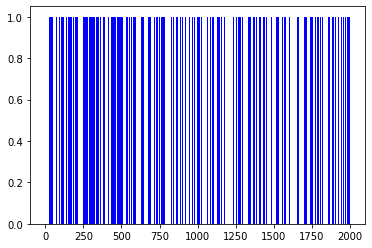

In [11]:
print("Score over time: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()